### Statistics Fundamentals, revisited

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import norm, skew, kurtosis, t
from scipy.stats.mstats import normaltest
from IPython.display import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#### The Normal Distribution
$\tilde{X}$: normally distributed, mean $\mu_X$, standard deviation $\sigma_X$:

$$ X \sim N(\mu_x, \sigma_x )$$

has probability density function (pdf):

$$ \text{pdf}(x,\mu,\sigma) = \frac{1}{\sigma \sqrt{2 \pi}}
e^{-\frac{1}{2}\left(\frac{\mu - x}{\sigma}\right)^2}$$

#### Exponential & Logarithmic Functions

/Users/Stefan/.virtualenvs/ga_dat/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


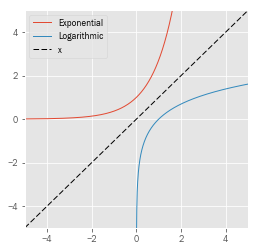

In [12]:
x = np.linspace(-5, 5, 1000) # 1K even-spaced numbers
data = pd.DataFrame({'Exponential': np.exp(x), 
                     'Logarithmic': np.log(x), 'x': x}, index=x)
data.plot(xlim=[-5, 5], ylim=[-5, 5], style={'x': 'k--'}, figsize=(4,4));

#### Standard Normal Distribution

Using
$$\mu = 0, $$ and 
$$\sigma = 1 $$
the above simplifies to:
$$ \text{pdf}(x) = \frac {e^{- \frac {x^{2}}{2}}} {\sqrt{2 \pi}} $$


#### Standardizing normal distributions
We can standardize any variable that has a normal distribution so that it has a standard normal distribution by subtracting the mean and dividing by the standard deviation. In other words:

$$ X \sim N(\mu_x, \sigma_x ) \iff \frac{X - \mu_x}{\sigma_x} \sim N(0, 1)$$

In [22]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
x = np.linspace(-10, 10, 10000) 

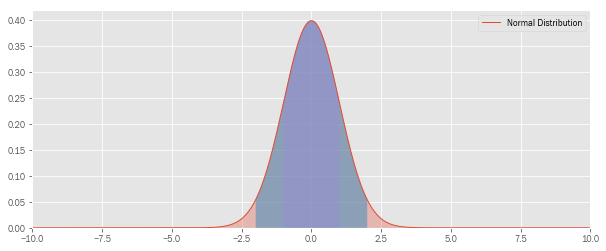

In [23]:
@interact(mu=(-10.0,10.0,0.5), sigma=(1.0, 5))
def normal_pdf(mu=0, sigma=1):
    y = norm.pdf(x, loc=mu, scale=sigma)
    df = pd.Series(y, x, name='Normal Distribution')
    df.plot(figsize=(10, 4), ylim=[0, np.max(norm.pdf(x))*1.05], legend=True)
    plt.fill_between(x, df.values, alpha=0.3)
    plt.fill_between(x[np.where(np.logical_and(x>=mu-2*sigma, x<=mu+2*sigma))], df[mu-2*sigma:mu+2*sigma].values, alpha=0.5)    
    plt.fill_between(x[np.where(np.logical_and(x>=mu-sigma, x<=mu+sigma))], df[mu-sigma:mu+sigma].values, alpha=0.5)        

#### The 68 - 95 - 99 rule revisited

#### Question: write a loop that prints the percentage of values within 1, 2 and 3 standard deviations from the mean.

In [5]:
print 'Percent of values within:'
for diff in [1,2,3]:
    print '- {0} standard deviations: {1:.2f}%'\
        .format(diff, (norm.cdf(diff) - norm.cdf(-diff)) * 100)

Percent of values within:
- 1 standard deviations: 68.27%
- 2 standard deviations: 95.45%
- 3 standard deviations: 99.73%


#### Question: How do these relate to confidence intervals?

Answer: 

In [24]:
## Setting up the base data independent of interactive feature
x = np.linspace(-3, 3, 10000)
data = pd.DataFrame({'pdf': norm.pdf(x), 'cdf': norm.cdf(x)}, index=x)

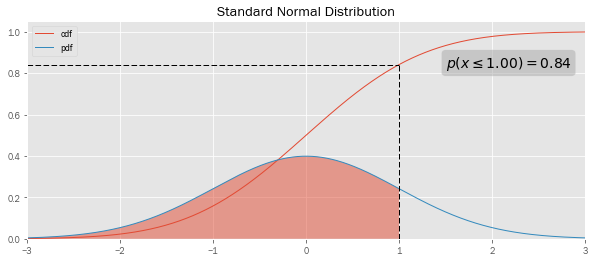

In [25]:
@interact(value=(-3.0,3.0, 0.1))
def normal_cdf(value):
    ax = data.plot(figsize=(10, 4), ylim=[0, 1.05], title='Standard Normal Distribution');    
    idx = np.abs(x-value).argmin()
    plt.fill_between(x[0:idx], 0, norm.pdf(x[:idx]), alpha=0.5)
    plt.axvline(value, 0, norm.cdf(x[idx])/1.05, ls='--', c='black')
    plt.axhline(norm.cdf(value), xmin=0, xmax=(value + 3) / 6, ls='--', c='black')
    ax.text(0.75, 0.85, '$p(x\\leq%.2f)=%.2f$'%(value, norm.cdf(value)), transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='darkgrey', alpha=0.5));

#### Question: Using the slider, calculate $P( \tilde{x} \leq -1)$

Answer:

#### Question: Calculate $P( \tilde{x} \geq -1)$

Answer:

#### Question: Calculate $P( -1 \leq \tilde{x} \leq 1)$:

#### Statistical Functions

[scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) makes dozens of distributions and related functionality available. Let's look in more detail at one example, [scipy.stats.norm](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm).

#### Calculate $\mu$, $\sigma$, skewness and kurtosis for  
$$X \sim N(\mu_X=10, \sigma_X=20)$$

In [11]:
norm.stats(10,20, 'mvsk')

(array(10.0), array(400.0), array(0.0), array(0.0))

#### Which method returns the probability that values are below the given value? 

Answer:

In [14]:
norm.cdf(x=-1)

0.15865525393145707

#### Which method returns the probability that values are above the given value? 

In [16]:
norm.sf(x=-1)

0.84134474606854293

Answer:

#### Redo the calculations that used the slider.

#### Which method returns the percentile, i.e. the value for which  values are below with the given probability?

#### Question: Calculate $X$ for $P(\tilde{x} \leq X) = 0.25$.

In [18]:
norm.ppf(0.21)

-0.80642124701824036

#### Let's plot two different distributions

#### Question: plot the lognormal distribution (take a look at the docs)

#### Question: plot the logistic distribution

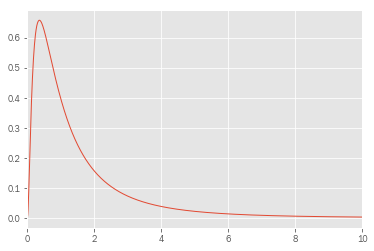

In [8]:
from scipy.stats import lognorm
x = np.arange(0, 10, 0.01)
pdf = lognorm.pdf(x, s=1)
pd.Series(pdf, index=x).plot();

#### Critical values for hypothesis tests

So far, we looked at the probability that values lie between upper and lower bounds defined by standard deviations from the mean.

We can also identify values that correspond to certain cumulative probabilities. These will be useful for hypothesis testing.

#### Question: write a function that print the values for which 1%, 5%, and 10% for values are smaller / larger. Do the same for 'two-tailed' tests.

In [26]:
def critical_values(alphas, type='one-tailed'):
    """Calculate the critical values corresponding to given thresholds"""
    if type not in ['one-tailed', 'two-tailed']:
        return 'type needs to be one-tailed or two-tailed'
    for alpha in alphas:
        x = alpha / 2 if type == 'two-tailed' else alpha
        print '{0}%: [{1:.2f}, {2:.2f}]' \
        .format(int((1-alpha)*100), norm.ppf(x), norm.ppf(1-x))

In [27]:
print 'Two-sided tests - critical values:'
critical_values([0.01, 0.05, 0.1], 'two-tailed')
#     print '{0}%: [{1:.2f}, {2:.2f}]'.format(int((1-2*value)*100), norm.ppf(value), norm.ppf(1-value))

Two-sided tests - critical values:
99%: [-2.58, 2.58]
95%: [-1.96, 1.96]
90%: [-1.64, 1.64]


In [36]:
    print 'One-sided tests - critical values:'
critical_values([0.01, 0.05, 0.1], 'one-tailed')

One-sided tests - critical values:
99%: [-2.33, 2.33]
95%: [-1.64, 1.64]
90%: [-1.28, 1.28]


Answer:

### Samples & Sample Statistics

Our data are always a **sample** of a **population** or **universe**, which contains all our elements of interest.

If sampling is random, so that each member of the population had equal probability to be selected, the values in the sample will be distributed just as the population.

One task of a data scientist is to use information contained in our sample to estimate unknown values for population parameters, like the mean, or the standard deviation, or differences between means for different groups. 

The values we compute from our sample data to estimate population parameters are called **sample statistics**. Because our data constitute a random sample, the sample statistics are also random in nature, and have a **sampling distribution** that depends on the (assumed) distribution of the underlying sample.

#### The distribution of the sample mean $\bar{X}$

* **Central Limit Theorem**: N > 30 => normal distribution
* **unbiased estimate**: $\bar{X} = \mu_X$
* **standard error**: $s_{\bar{X}} = \frac{s_X}{\sqrt{N}}$

$$ \bar{X} \sim N(\mu_X, \frac {\sigma_X^2}{N}) $$

#### Standardizing the Sample Mean Distribution
We can standardize the sample mean by subtracting the mean, and dividing by the sample standard deviation so that it follows a **standard** normal distribution:

$$ \frac {\bar{X} - \mu_X}{\frac {\sigma_X}{\sqrt{N}}} \sim N(0, 1) = Z$$

#### Sample Mean Confidence Interval

Now we can calculate the probabilities that the mean lies in a given interval using the standard normal distribution:
$$ P(a< \bar{X} < b) = P\left(\frac{a-\mu_X}{\sigma_X} < Z < \frac{b-\mu_X}{\sigma_X}\right) $$

#### Question: How likely is it to observe $\bar{X}=2$ if $\mu_X=0$?

Answer:

#### When $\sigma_X$ is unknown: The student t-Distribution
Our discussion of the distribution of our estimate of the sample mean above assumed that we know the true standard deviation of the population $\sigma_X$. 

However, we typlically rely on our estimate of the sample standard deviation instead. This estimate also has a sampling distribution, and combining the estimates of the mean and the standard deviation yields a new distribution, the `t distribution`, which takes a `degrees of freedom` parameter.

#### For small samples (N<120), t has higher kurtosis than N(0, 1)

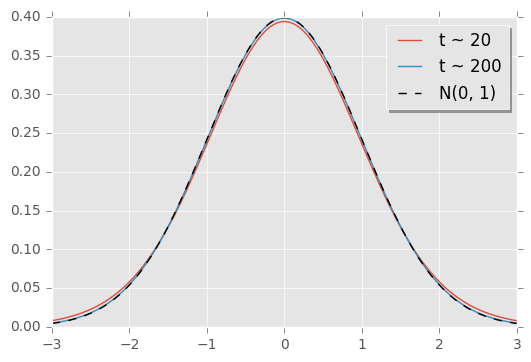

In [14]:
def plot_t_distribution(df_list=[20, 200]):
    x = np.linspace(-3, 3, 1000)
    for df in df_list:
        plt.plot(x, t.pdf(x, df=df), label='t ~ {}'.format(df))
    plt.plot(x, norm.pdf(x), label='N(0, 1)', ls='--', c='black')
    plt.legend(loc='best', shadow=True);
plot_t_distribution()

#### Use a list comprehension to show the base stats for the t Distribution with $\text{df}=10, 20, ... 200$

In [15]:
print pd.concat([pd.Series(t(df=df).stats('mvsk')).to_frame(df) 
                 for df in range(10, 201, 30)], axis=1).T

       0       1    2       3
10   0.0  1.2500  0.0  1.0000
40   0.0  1.0526  0.0  0.1667
70   0.0  1.0294  0.0  0.0909
100  0.0  1.0204  0.0  0.0625
130  0.0  1.0156  0.0  0.0476
160  0.0  1.0127  0.0  0.0385
190  0.0  1.0106  0.0  0.0323


#### Example: Sample Mean
Using our estimate $s_X$, we now get for the distribution of the sample mean:

$$ \frac {\bar{X} - \mu_X}{\frac {s_X}{\sqrt{N}}} \sim  t_{N-1}$$

#### Confidence Interval
A confidence interval estimate consists of a lower bound and an upper bound within which we expect $x$ to reside with given probability. 

A confidence interval estimate for the sample mean obtains these values from the matching sampling distribution - the $t$ distribution.

So for confidence level $1 - \alpha$, for instance 95%:
$$ P\left(t_{N-1, \frac{\alpha}{2}} \leq \frac {\bar{X} - \mu_X}{\frac {s_X}{\sqrt{N}}} \leq t_{N-1, 1-\frac{\alpha}{2}}\right) = 1 - \alpha $$
This implies the following confidence interval boundaries 
$$ P\left(\bar{X} - t_{N-1, 1-\frac{\alpha}{2}} \frac{s_X}{\sqrt{N}} \leq \mu_X \leq \bar{X} + t_{N-1, 1-\frac{\alpha}{2}} \frac{s_X}{\sqrt{N}} \right) = 1 - \alpha $$

#### Question: Let's calculate a confidence interval for the following values:

In [37]:
np.random.seed(42)
values = np.random.randint(-100, 100, 50)
values


array([  2,  79,  -8, -86,   6, -29,  88, -80,   2,  21, -26, -13,  16,
        -1,   3,  51,  30,  49, -48, -99, -13,  57, -63,  29,  91,  87,
       -80,  60, -43, -79, -12, -52, -42,  69,  87, -86,  89,  89,  74,
        89, -50,   7, -46, -37,  30, -50,  34, -80, -28,  66])

In [42]:
mu, s = np.mean(values), np.std(values, ddof=1)
print mu, s
l, u = t.interval(0.95, 49)
print l, u
print mu + l * s / np.sqrt(50), mu + u * s / np.sqrt(50)


3.08 58.1499960517
-2.00957523449 2.00957523449
-13.4460460033 19.6060460033


In [43]:
t_alpha = t.ppf(0.975, df=49)
lower = mu - t_alpha * s / np.sqrt(50)
upper = mu + t_alpha * s / np.sqrt(50)
print 'Critical value: {:.2f}'.format(t_alpha)
print 'Interval: [{0:.2f}, {1:.2f}]'.format(lower, upper)

Critical value: 2.01
Interval: [-13.45, 19.61]


#### Hypothesis Test: Null Hypothesis
Now let's test the hypothesis that the population mean equals a certain value, given our sample mean estimate, which is our **test statistic**.

$$ H_0: \mu_x=a$$
$$ H_1: \mu_x\neq a$$

Similar to our confidence interval estimate, we are going to create an interval that assumes that our $H_0$ is true. If our sample value falls outside this interval, we reject $H_0$. If not, we cannot reject $H_0$. 

Note that rejecting $H_0$ does not imply that $H_1$ is necessarily true; the value that we observed just happens to make $H_0$ very unlikely.

$$ \left( a \pm t_{N-1, 1-\alpha/2}\frac{s_X}{N} \right)$$

#### p-value

Just how unlikely is our sample finding **if** $H_0$ is true? We simply obtain this value from the distribution that assumes $H_0$ is true as we did above. The resulting value is our p-value.

$$P(x\geq \bar{X}) = 1 - cdf_{H_0}(\bar{X})$$

#### Significance of Regression Coefficients
Under certain assumptions (esp. normally distributed errors), the regression coefficients are normally distributed:

$$ \hat{\beta_i} \sim N\left(\beta, \frac{\sigma_Y^2}{\sum_{i=1}^{N}(X_i-\bar{X})^2}\right) $$

#### Hypothesis Tests
For the hypothesis that a parameter equals certain value $a$:

$$H_0: \beta_1=a$$
$$H_1: \beta_1\neq a$$
We calculate critical values as follows:

$$\left|\frac{\hat{\beta_j}-a}{s_{\hat{\beta_j}}}\right| > t_{\left(n-k-1-\frac{\alpha}{2}\right)}$$

### Advertisement Regression Example
#### Run a regression for our advertisement data and interpret the results

In [19]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', 
                   index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [20]:
import statsmodels.api as sm
X = data[['TV', 'Radio', 'Newspaper']]
Y= data['Sales']
X = sm.add_constant(X)
print X.head()
model = sm.OLS(Y, X)
# model = sm.OLS('Sales ~ TV + Radio + Newspaper')
results = model.fit()
results.summary()


   const     TV  Radio  Newspaper
1      1  230.1   37.8       69.2
2      1   44.5   39.3       45.1
3      1   17.2   45.9       69.3
4      1  151.5   41.3       58.5
5      1  180.8   10.8       58.4


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 04 Oct 2016   Prob (F-statistic):           1.58e-96
Time:                        20:46:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Apply seaborn coefplot to this dataset. What are the available options?

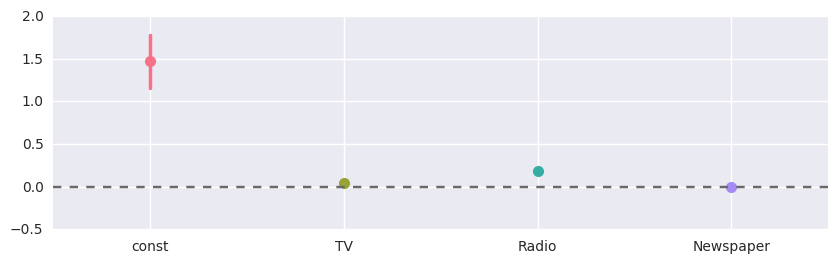

In [52]:
import seaborn as sns
sns.coefplot(formula='Sales ~ const + TV + Radio + Newspaper', data=pd.concat([Y, X], axis=1))

### Simulating the Standard Error of the Mean
Let's simulate the standard error of the mean by selecting random samples from a hypothetical population with $\mu = 1000 $ and $\sigma = 200 $.

* Simulate 1,000 samples of various sizes N=100, 200, 300, ... 5,000
* calculate the mean for each sample, and 
* the standard error of the means for each sample size
* plot the result

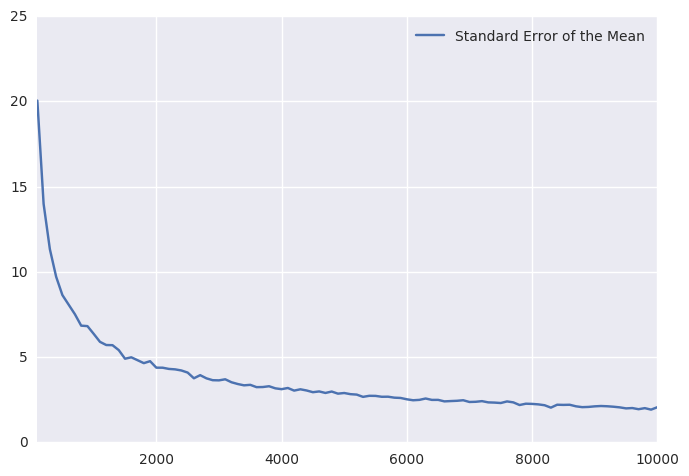

In [53]:
mu, sigma = 1000, 200
standard_error, mean_distribution = {}, {}
for N in list(np.arange(100, 10001, 100)):
    sample_means = [np.mean(np.random.normal(mu, sigma, N)) for _ in range(1000)]
    if N==100 or N % 2000 == 0:
        mean_distribution[N] = sample_means
    standard_error[N] = np.std(sample_means)
pd.Series(standard_error, name='Standard Error of the Mean').T.sort_index().plot(legend=True);

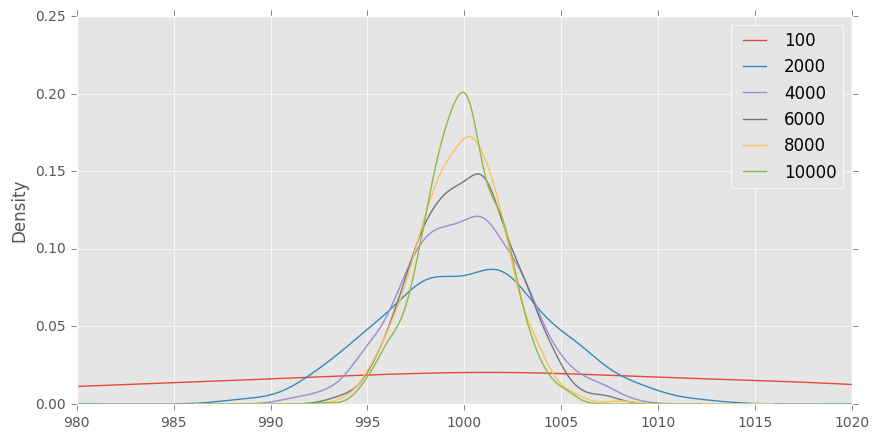

In [22]:
dist = pd.DataFrame(mean_distribution)
dist.plot.density(figsize=(10,5), xlim=[980, 1020]);

In [23]:
def get_stats(means):
    return pd.Series([normaltest(means).pvalue, skew(means), kurtosis(means)], 
                     index=['p_value', 'skew', 'kurtosis'])

print dist.apply(get_stats)

           100     2000    4000    6000    8000    10000
p_value   0.5253  0.5383  0.9850  0.2735  0.3372  0.7898
skew     -0.0861  0.0590  0.0003  0.1103  0.0891 -0.0528
kurtosis -0.0462 -0.1320 -0.0432 -0.1230  0.1305 -0.0201


In [24]:
print get_stats(np.random.normal(mu, sigma, 2000))


# pd.Series(sample).plot.density(figsize=(10, 5), xlim=[500, 1500]);

p_value     0.3177
skew       -0.0564
kurtosis   -0.1216
dtype: float64
